In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(10,5)})
import warnings
warnings.filterwarnings('ignore')

# Read Data Using Pandas

In [30]:
df = pd.read_csv('/home/steadfast/Desktop/Relevant/Csv/heart.csv')

In [31]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [109]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Rename DataSets if Required

In [32]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [33]:
new_columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'Target']

In [34]:
df.columns = new_columns

In [35]:
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Data Exploration and Cleaning

In [36]:
df.shape

(303, 14)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  Target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [38]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [39]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
Target      0
dtype: int64

In [40]:
# install library for current python version , Missingo us a good library to visualize null values  
import sys
!{sys.executable} -m pip install missingno

Defaulting to user installation because normal site-packages is not writeable


<AxesSubplot: >

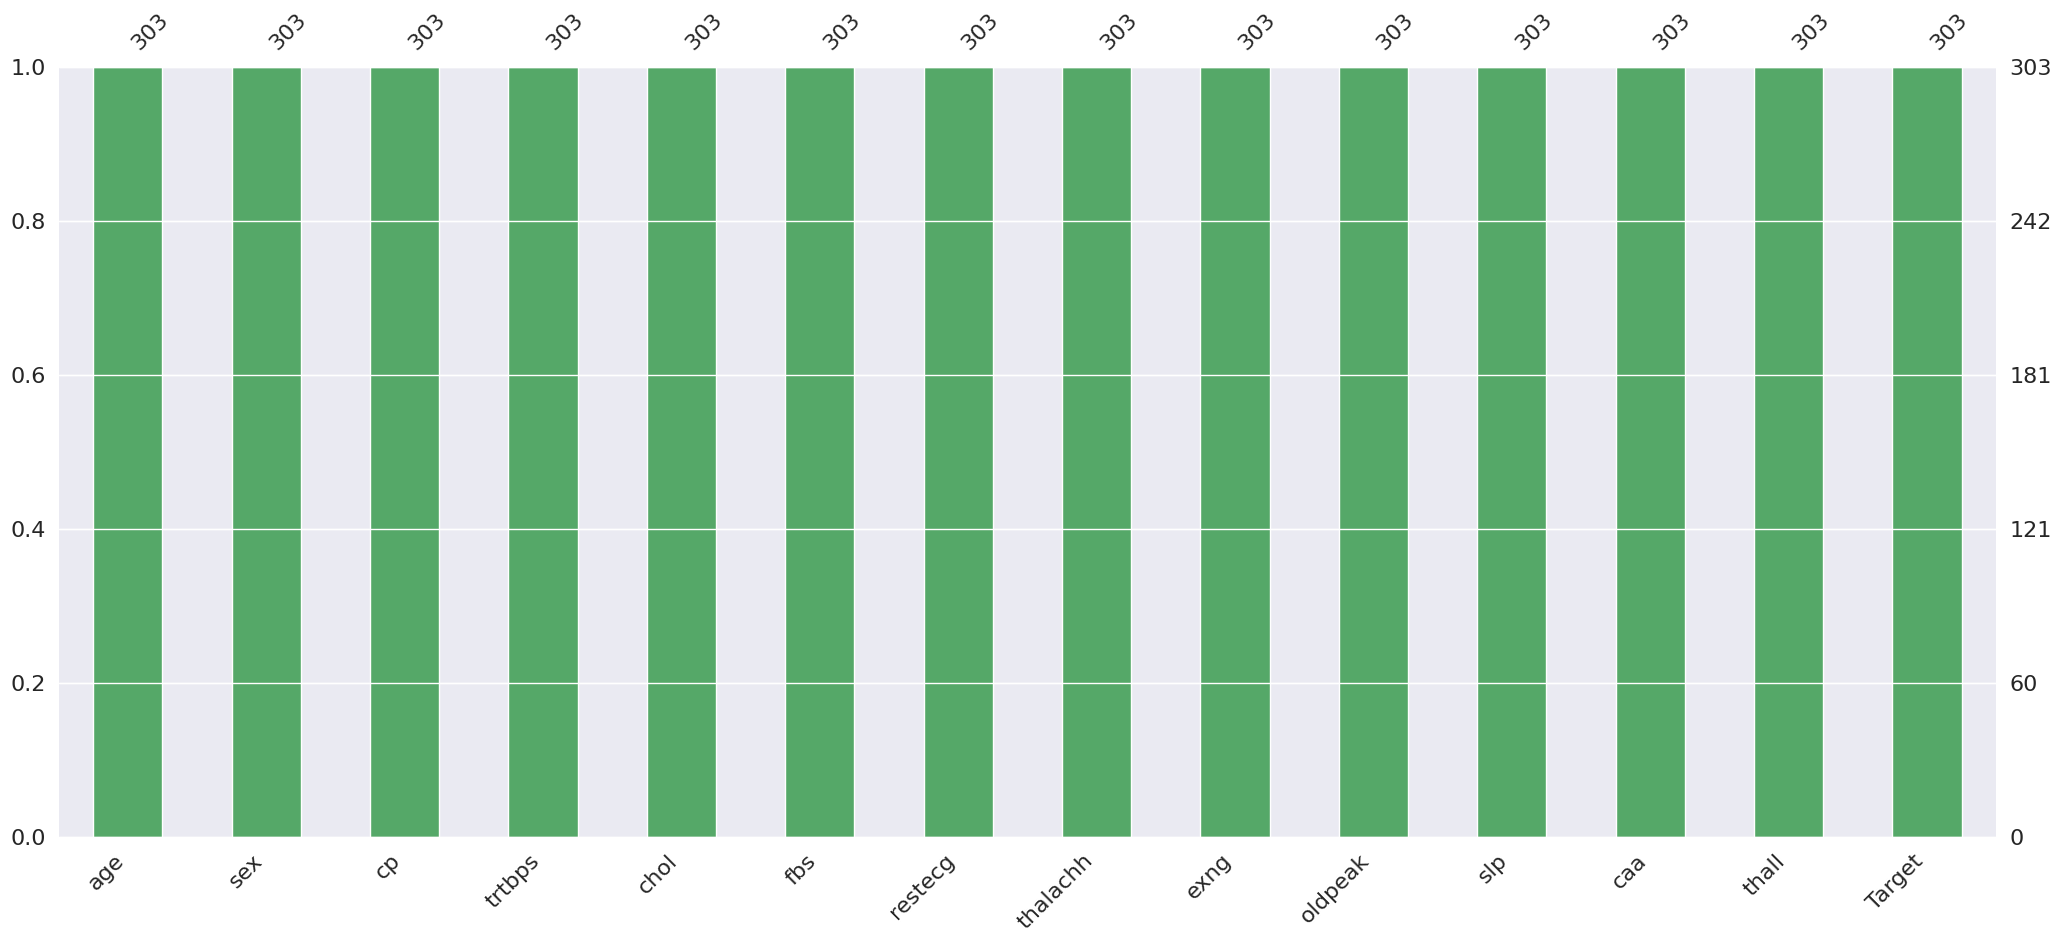

In [41]:
import missingno as msno
msno.bar(df,color='g')

In [42]:
# To check for single column as cat/num
df['cp'].value_counts() # ----> category

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [43]:
df['cp'].value_counts().count()

4

In [44]:
# function to know is this column category , numbery
unique_value=[]
for c in df.columns:
    v_c = df[c].value_counts().count()
    unique_value.append(v_c)

pd.DataFrame(unique_value,index=df.columns,columns=['Total Unique Values'])

,Total Unique Values
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


In [45]:
df.duplicated().sum()

1

In [46]:
df.drop_duplicates()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [86]:
numeric_cols = ['age','trtbps','chol','thalachh','oldpeak']
categorical_cols = ['sex','cp','fbs','restecg','exng','slp','caa','thall','Target']

# Data Visulization

<AxesSubplot: ylabel='age'>

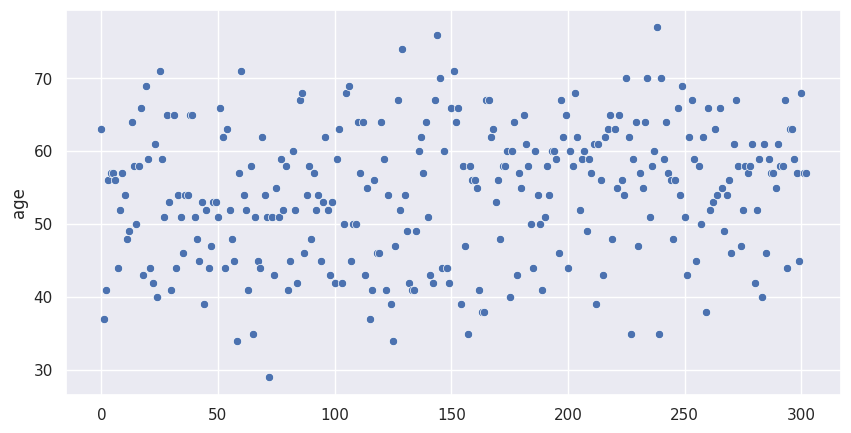

In [87]:
sns.scatterplot(df['age'])

<AxesSubplot: xlabel='age', ylabel='cp'>

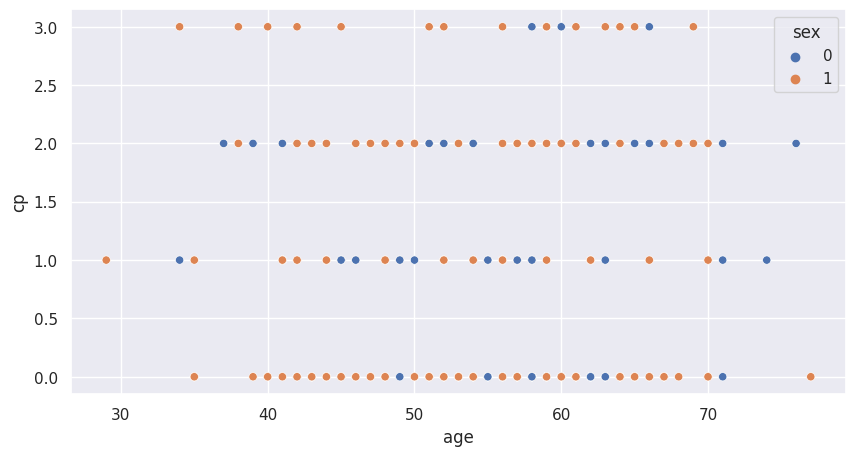

In [88]:
sns.scatterplot(x='age', y='cp', data=df, hue=df['sex'])

<AxesSubplot: xlabel='trtbps', ylabel='chol'>

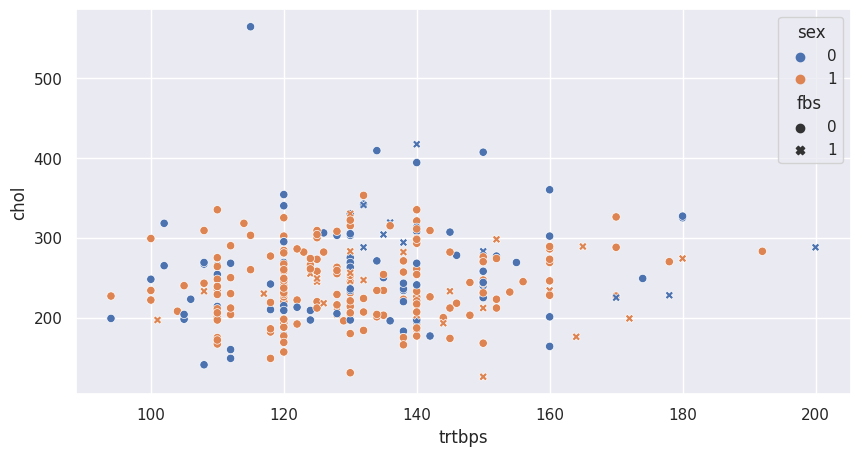

In [89]:
sns.scatterplot(x='trtbps', y='chol', data=df, hue=df['sex'], style=df['fbs'])

Text(0.5, 1.0, 'Age')

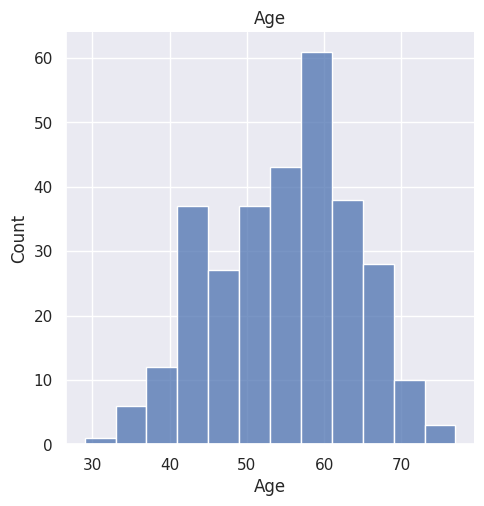

In [90]:
# viaualize numeric ---> category : using historgram 
sns.displot(df['age'])
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age')

Text(0.5, 1.0, 'trtbps')

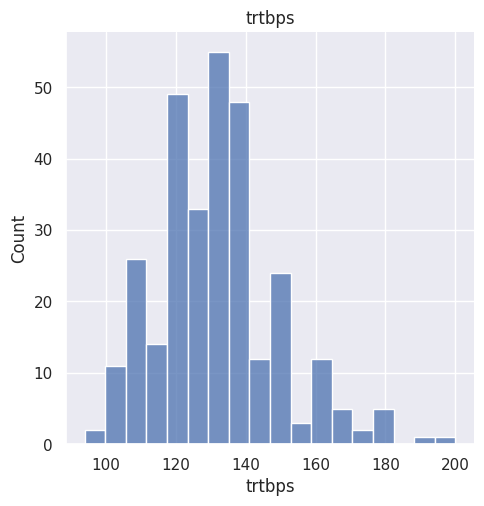

In [91]:
sns.displot(df['trtbps'])
plt.xlabel('trtbps')
plt.ylabel('Count')
plt.title('trtbps')

Text(0.5, 1.0, 'oldpeak')

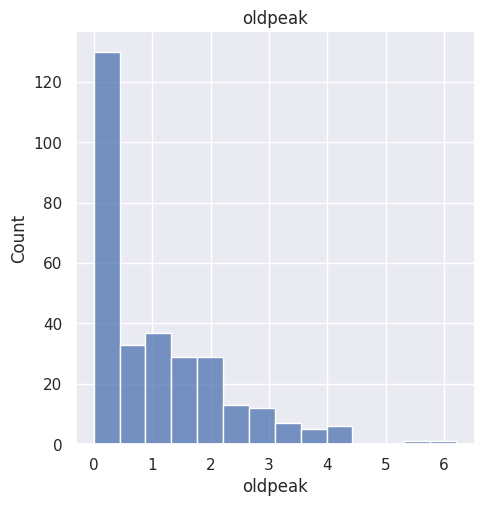

In [92]:
sns.displot(df['oldpeak'])
plt.xlabel('oldpeak')
plt.ylabel('Count')
plt.title('oldpeak')

In [93]:
categorical_cols

['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall', 'Target']

<AxesSubplot: ylabel='sex'>

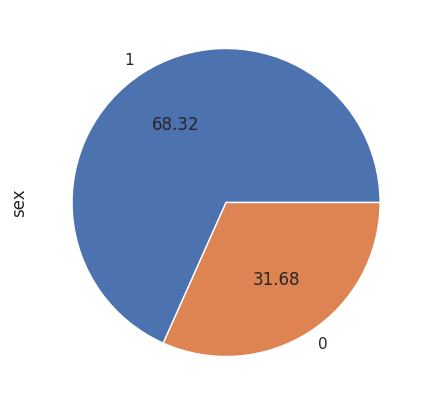

In [94]:
df['sex'].value_counts().plot(kind='pie', autopct="%.2f")

<AxesSubplot: >

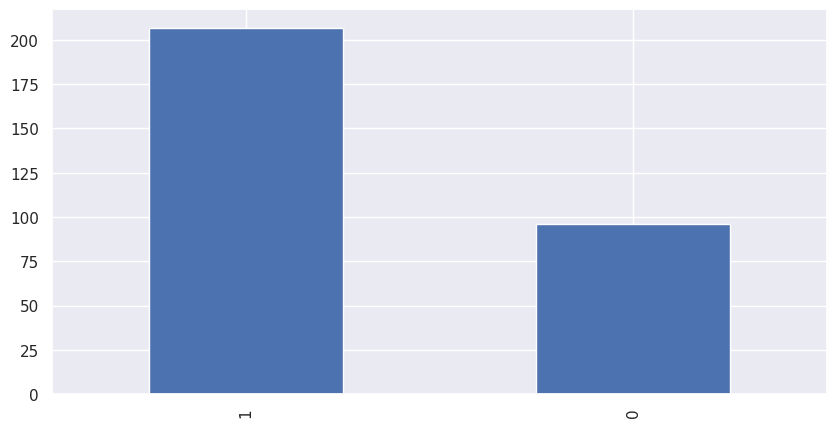

In [95]:
df['sex'].value_counts().plot(kind='bar')

<AxesSubplot: ylabel='cp'>

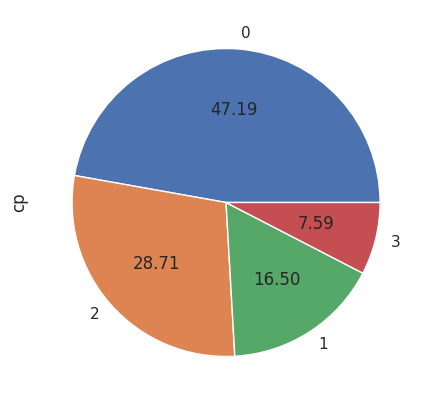

In [96]:
df['cp'].value_counts().plot(kind='pie', autopct="%.2f")

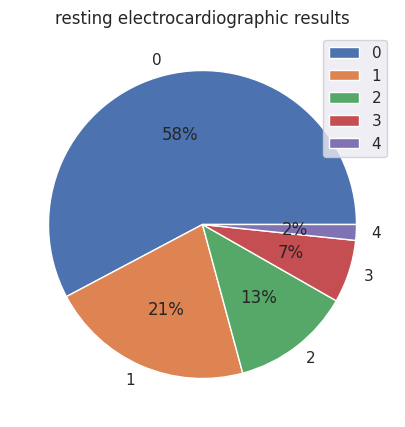

In [97]:

plt.pie(df['caa'].value_counts(),autopct='%.0f%%',labels=df['caa'].value_counts().index)
plt.title('resting electrocardiographic results')
plt.legend()

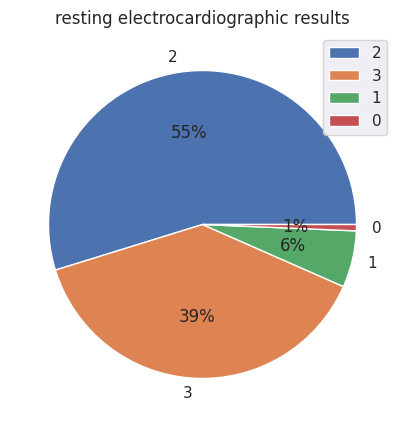

In [98]:
myexplod = [.1,0]
plt.pie(df['thall'].value_counts(),autopct='%.0f%%',labels=df['thall'].value_counts().index)
plt.title('resting electrocardiographic results')
plt.legend()

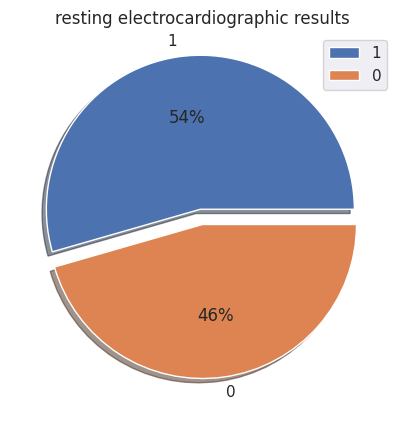

In [99]:
myexplod = [.1,0]
plt.pie(df['Target'].value_counts(),autopct='%.0f%%',labels=df['Target'].value_counts().index,explode=myexplod,shadow=True)
plt.title('resting electrocardiographic results')
plt.legend()

# Bivariate Analysis : Categorical

<AxesSubplot: xlabel='sex', ylabel='count'>

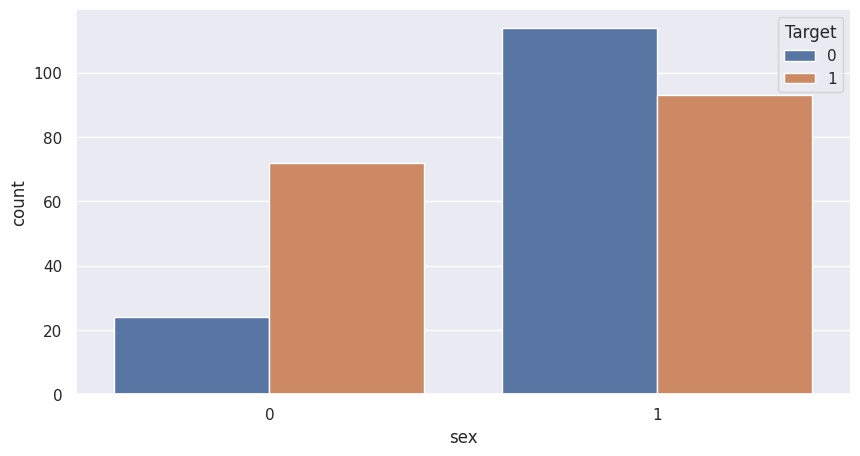

In [100]:
sns.countplot(x='sex',hue='Target',data=df)

<AxesSubplot: xlabel='cp', ylabel='count'>

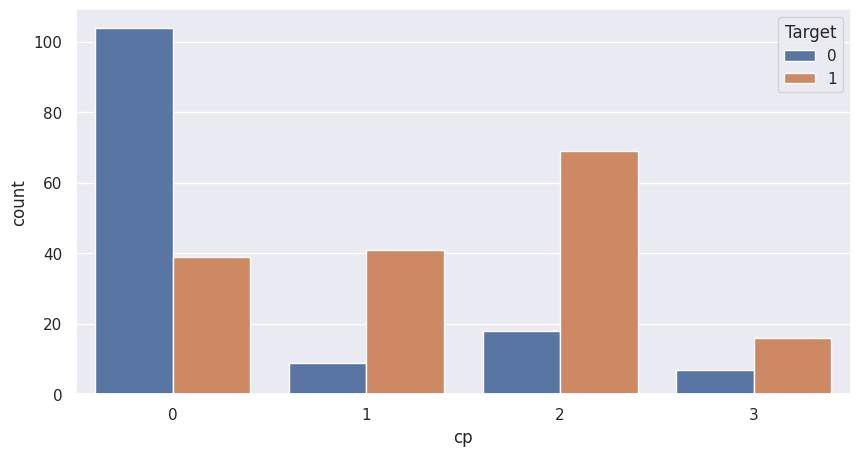

In [101]:
sns.countplot(x='cp',hue='Target',data=df)

<AxesSubplot: xlabel='fbs', ylabel='count'>

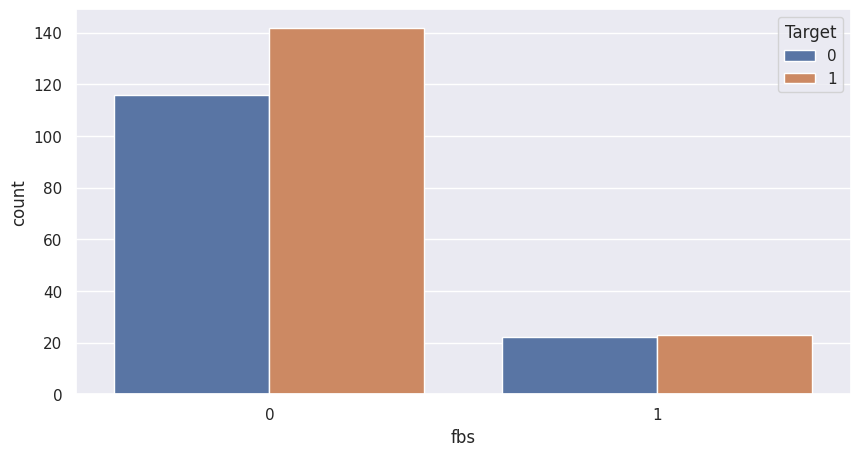

In [102]:
sns.countplot(x='fbs',hue='Target',data=df)

<AxesSubplot: xlabel='slp', ylabel='count'>

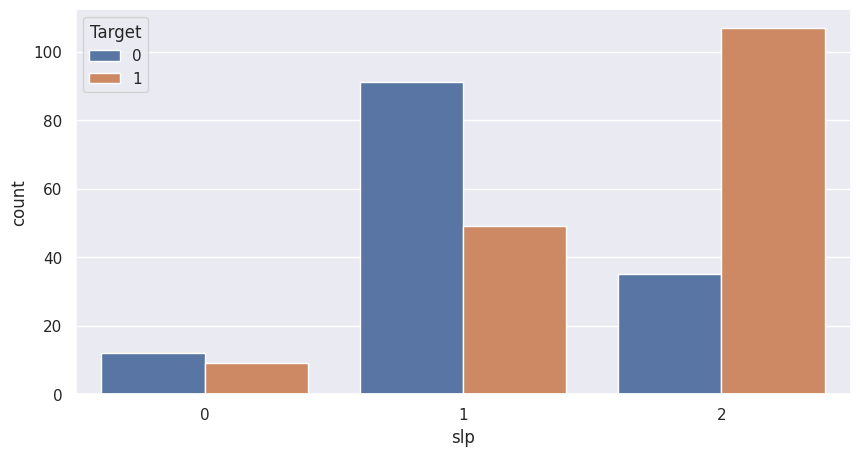

In [103]:
sns.countplot(x='slp',hue='Target',data=df)

In [104]:
df.corr()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalachh,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exng,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot: >

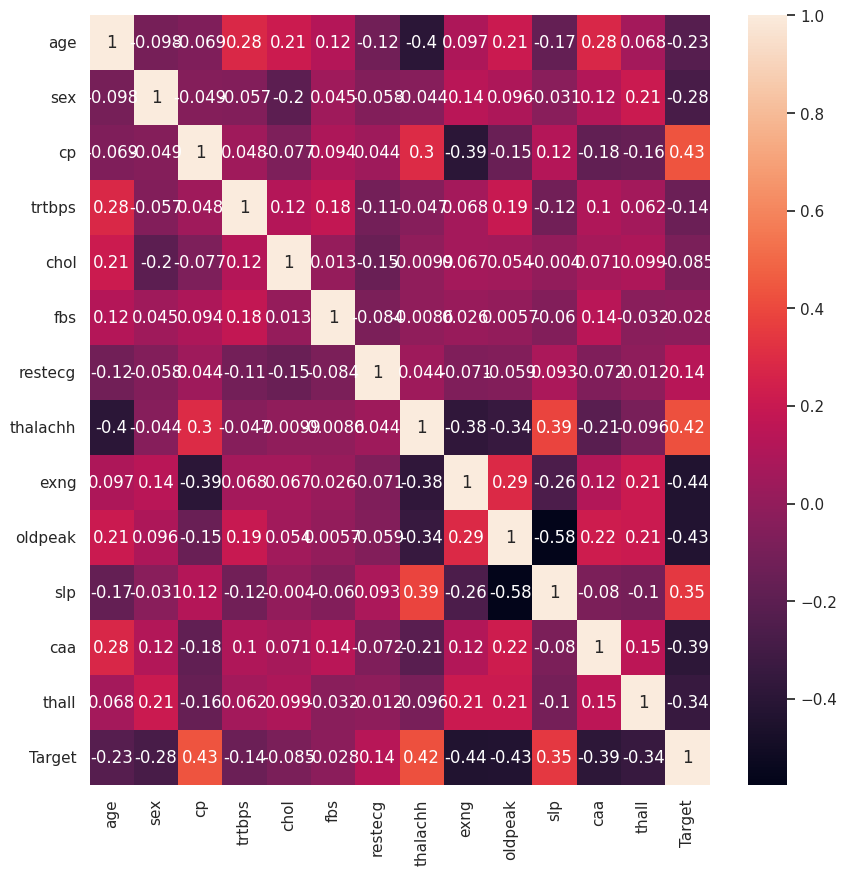

In [105]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot: >

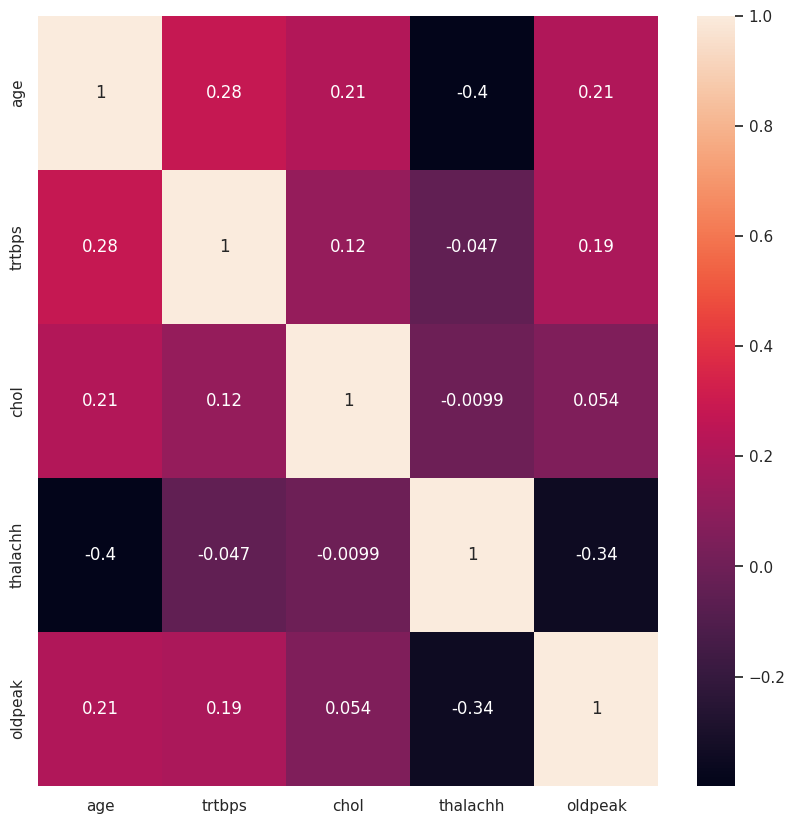

In [106]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_cols].corr(),annot=True)

<AxesSubplot: >

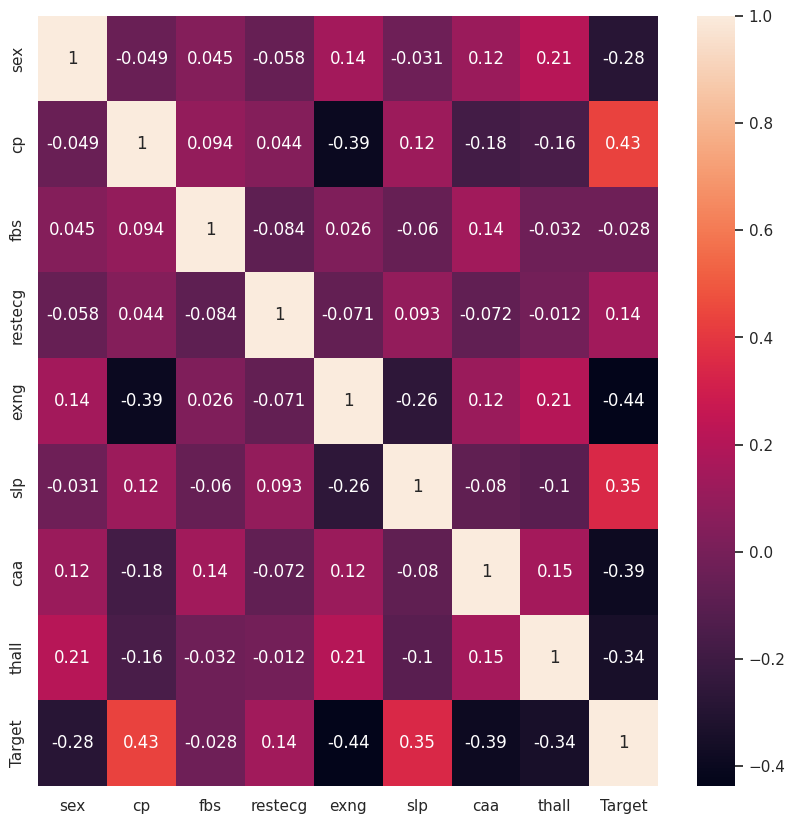

In [107]:
plt.figure(figsize=(10,10))
sns.heatmap(df[categorical_cols].corr(),annot=True)

In [108]:
df[categorical_cols].corr().iloc[:,[-1]]

,Target
sex,-0.280937
cp,0.433798
fbs,-0.028046
restecg,0.137230
exng,-0.436757
slp,0.345877
caa,-0.391724
thall,-0.344029
Target,1.000000


# Build Machine Learning Model

In [111]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
# encode the categorical columns 
df2 = pd.get_dummies(df,columns=categorical_cols[:-1],drop_first=True)

In [114]:
df2.head()

,age,trtbps,chol,thalachh,oldpeak,Target,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0


In [121]:
x = df2.drop(['Target'], axis=1)
y = df2[['Target']]

In [122]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=7)

# Decision Tree

In [125]:
from sklearn.tree import DecisionTreeClassifier

#build Model
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train, y_train)

y_pred = dt_model.predict(x_test)

accuracy_score(y_test,y_pred)

0.6229508196721312

In [126]:
## decision tree with cross validation 
scores = cross_val_score(dt_model , x_test , y_test , cv=10)
scores.mean()

0.5380952380952381

# Random Forest

In [128]:
from sklearn.ensemble import RandomForestClassifier

# model
rf_model = RandomForestClassifier()
rf_model.fit(x_train , y_train)

# predict
y_pred = rf_model.predict(x_test)

# score
accuracy_score(y_test,y_pred)


0.7377049180327869

In [130]:
## Grid Search with randomforest

rf_model2 = RandomForestClassifier()
parameters = {
    'n_estimators' : [10,50,100,150,200] , 
    'criterion' : ['gini','entropy'] , 
    'bootstrap' : [True,False]
}

rd_model_gs = GridSearchCV(rf_model2 , param_grid=parameters)
rd_model_gs.fit(x_train , y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [131]:
rd_model_gs.best_params_

{'bootstrap': True, 'criterion': 'entropy', 'n_estimators': 10}

In [133]:
f_rd_m = RandomForestClassifier(bootstrap= True, criterion= 'gini', n_estimators= 50)
f_rd_m.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [135]:
# predict
y_pred = f_rd_m.predict(x_test)

# score
accuracy_score(y_test,y_pred)

0.7213114754098361